In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import keras
from keras.layers import Dense

In [9]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
# Decriptive analysis
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

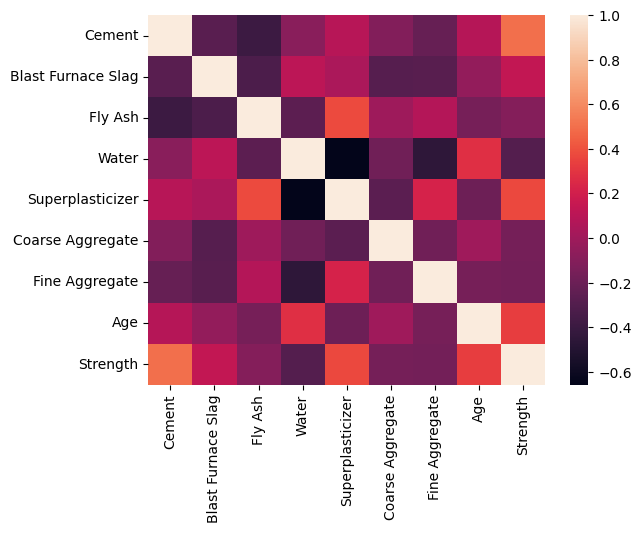

In [11]:
# Correlation analysis
corr = df.corr()
sns.heatmap(corr)

In [12]:
# Splitting predictor and taraget variables
target='Strength'
y=df[target]
X=df.drop(columns=target)

In [13]:
# Standardizing predictors
X_norm=(X-X.mean())/X.std()
X_norm.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [16]:
# Convert X_norm and y to numpy arrays
X_norm = np.array(X_norm, dtype=np.float32) 
y = np.array(y, dtype=np.float32) 

# Check the dtype of X_norm and y
print(X_norm.dtype) 
print(y.dtype)       


float32
float32


### Using Hidden layer as 20 and epochs is 10

In [24]:
# Function for regression task
def regression_model():
    model=keras.Sequential()
    model.add(Dense(20, activation='relu', input_shape=(8,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [25]:
# Building the model
model=regression_model()
model.fit(X_norm, y, validation_split=0.3, verbose=2, epochs=10)

Epoch 1/10
23/23 - 1s - 39ms/step - loss: 1696.2377 - val_loss: 1208.8507
Epoch 2/10
23/23 - 0s - 3ms/step - loss: 1648.2777 - val_loss: 1174.1676
Epoch 3/10
23/23 - 0s - 3ms/step - loss: 1584.5271 - val_loss: 1122.0061
Epoch 4/10
23/23 - 0s - 3ms/step - loss: 1490.5442 - val_loss: 1045.0289
Epoch 5/10
23/23 - 0s - 4ms/step - loss: 1360.1776 - val_loss: 943.2058
Epoch 6/10
23/23 - 0s - 3ms/step - loss: 1194.8293 - val_loss: 816.5650
Epoch 7/10
23/23 - 0s - 3ms/step - loss: 993.1940 - val_loss: 676.1970
Epoch 8/10
23/23 - 0s - 3ms/step - loss: 774.9870 - val_loss: 533.3167
Epoch 9/10
23/23 - 0s - 3ms/step - loss: 565.9249 - val_loss: 406.0448
Epoch 10/10
23/23 - 0s - 3ms/step - loss: 401.4372 - val_loss: 311.5010


### Using Hidden layer as 30 and epochs is 50

In [27]:
# Function for regression task
def regression_model():
    model=keras.Sequential()
    model.add(Dense(30, activation='relu', input_shape=(8,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [28]:
# Building the model
model=regression_model()
model.fit(X_norm, y, validation_split=0.3, verbose=2, epochs=50)

Epoch 1/50
23/23 - 1s - 40ms/step - loss: 1728.1868 - val_loss: 1204.4725
Epoch 2/50
23/23 - 0s - 4ms/step - loss: 1676.8186 - val_loss: 1163.1331
Epoch 3/50
23/23 - 0s - 3ms/step - loss: 1623.2852 - val_loss: 1117.1996
Epoch 4/50
23/23 - 0s - 3ms/step - loss: 1558.8417 - val_loss: 1060.9658
Epoch 5/50
23/23 - 0s - 3ms/step - loss: 1476.2848 - val_loss: 990.1772
Epoch 6/50
23/23 - 0s - 3ms/step - loss: 1368.0078 - val_loss: 902.6353
Epoch 7/50
23/23 - 0s - 3ms/step - loss: 1231.1605 - val_loss: 795.8898
Epoch 8/50
23/23 - 0s - 3ms/step - loss: 1067.0300 - val_loss: 673.5964
Epoch 9/50
23/23 - 0s - 3ms/step - loss: 882.0845 - val_loss: 546.6661
Epoch 10/50
23/23 - 0s - 3ms/step - loss: 691.5564 - val_loss: 420.1951
Epoch 11/50
23/23 - 0s - 3ms/step - loss: 520.5995 - val_loss: 311.8047
Epoch 12/50
23/23 - 0s - 3ms/step - loss: 394.3874 - val_loss: 236.0147
Epoch 13/50
23/23 - 0s - 3ms/step - loss: 318.5220 - val_loss: 190.7314
Epoch 14/50
23/23 - 0s - 3ms/step - loss: 279.4415 - val_los

### Using Hidden layer as 50 and epochs is 100

In [30]:
# Function for regression task
def regression_model():
    model=keras.Sequential()
    model.add(Dense(50, activation='relu', input_shape=(8,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [31]:
# Building the model
model=regression_model()
model.fit(X_norm, y, validation_split=0.3, verbose=2, epochs=100)

Epoch 1/100
23/23 - 1s - 48ms/step - loss: 1647.3419 - val_loss: 1144.9681
Epoch 2/100
23/23 - 0s - 4ms/step - loss: 1528.1816 - val_loss: 1043.0367
Epoch 3/100
23/23 - 0s - 3ms/step - loss: 1349.4482 - val_loss: 894.7845
Epoch 4/100
23/23 - 0s - 3ms/step - loss: 1086.3516 - val_loss: 696.8715
Epoch 5/100
23/23 - 0s - 3ms/step - loss: 764.5054 - val_loss: 477.0252
Epoch 6/100
23/23 - 0s - 3ms/step - loss: 471.5442 - val_loss: 301.4554
Epoch 7/100
23/23 - 0s - 3ms/step - loss: 307.3053 - val_loss: 205.3471
Epoch 8/100
23/23 - 0s - 4ms/step - loss: 246.3229 - val_loss: 169.6248
Epoch 9/100
23/23 - 0s - 3ms/step - loss: 222.5972 - val_loss: 159.9383
Epoch 10/100
23/23 - 0s - 3ms/step - loss: 209.0539 - val_loss: 157.2691
Epoch 11/100
23/23 - 0s - 3ms/step - loss: 199.0923 - val_loss: 159.0554
Epoch 12/100
23/23 - 0s - 3ms/step - loss: 191.7122 - val_loss: 157.9096
Epoch 13/100
23/23 - 0s - 3ms/step - loss: 185.0379 - val_loss: 156.0926
Epoch 14/100
23/23 - 0s - 3ms/step - loss: 179.5918 -